In [ ]:
P11= 0.7
P12= 0.3
P21= 0.1
P22 = 0.9
N1 = 1
N2 = 1
I1 = 5000
I2 = 50000
gamma_I = 0.011
gamma_A = 0.8*gamma_I
delta_I1 = gamma_I*P11*((P11*I1+P21*I2)/(P11*N1+P21*N2)) + gamma_I*P12*((P12*I1+P22*I2)/(P12*N1+P22*N2))
print(delta_I1)

209.6875


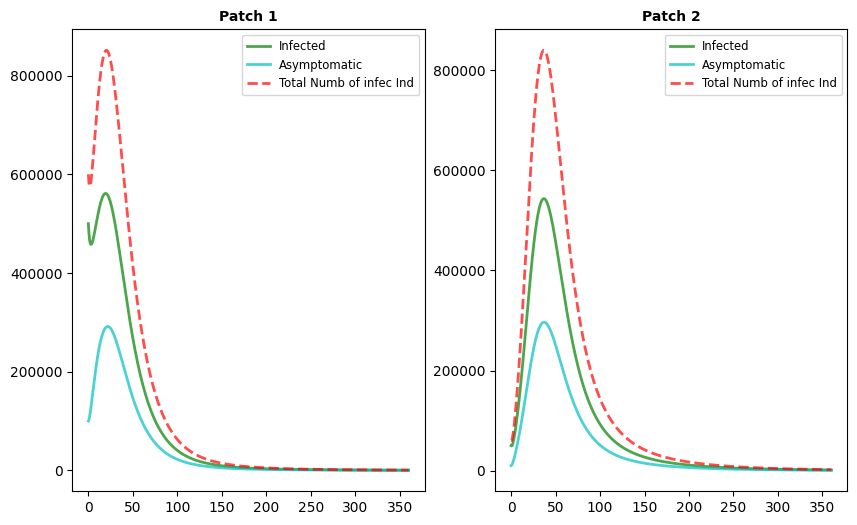

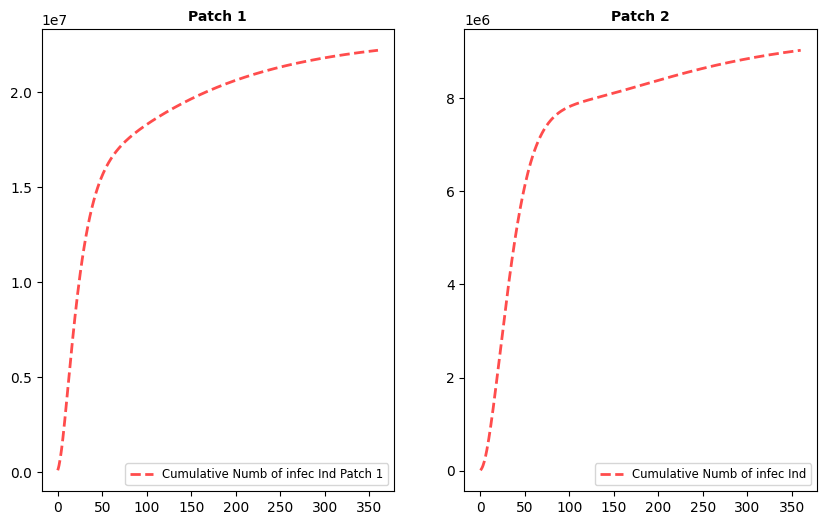

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint


# The model differential equations
def SEIAVR_model(y, t, gamma_I1, gamma_A1, gamma_I2, gamma_A2, alpha, nu, bi1, bi2, beta, phi, sigma, mu, mu_c, lambda_I, lambda_A, N1,N2, theta1,theta2, P11, P12, P21, P22):
    S1, E1, I1, A1, V1, R1, S2, E2, I2, A2, V2, R2 = y
    delta_I1 = gamma_I1*P11*((P11*I1+P21*I2)/(P11*N1+P21*N2)) + gamma_I2*P12*((P12*I1+P22*I2)/(P12*N1+P22*N2))
    delta_A1 = gamma_A1*P11*((P11*A1+P21*A2)/(P11*N1+P21*N2)) + gamma_A2*P12*((P12*A1+P22*A2)/(P12*N1+P22*N2))
    delta_I2 = gamma_I1*P21*((P11*I1+P21*I2)/(P11*N1+P21*N2))+gamma_I2*P22*((P12*I1+P22*I2)/(P12*N1+P22*N2))
    delta_A2 = gamma_A1*P21*((P11*A1+P21*A2)/(P11*N1+P21*N2))+gamma_A2*P22*((P12*A1+P22*A2)/(P12*N1+P22*N2))
    N1 = S1 + E1 + I1 + A1 + V1 + R1
    N2 = S2 + E2 + I2 + A2 + V2 + R2
    #Equations for Patch No 1 an No 2
    dS1dt = theta1 - nu * bi1 * S1 - S1 * delta_I1 - S1* delta_A1 - mu*S1
    dE1dt = S1 * delta_I1 + S1* delta_A1 + V1 *(1-alpha)*delta_I1 + V1 *(1-alpha)* delta_A1 - beta * E1 - mu*E1
    dI1dt = (1 - sigma)*beta*E1 - mu_c * I1 - lambda_I * I1 - mu*I1
    dA1dt = sigma * beta * E1 - lambda_A * A1 - mu*A1
    dV1dt = nu * bi1 * S1 - V1 *(1-alpha)*delta_I1 - V1 *(1-alpha)* delta_A1 - phi * V1 - mu * V1
    dR1dt = lambda_A * A1 + lambda_I * I1 + phi * V1 - mu*R1
    dS2dt =theta2 - nu * bi2 * S2 - S2 * delta_I2 - S2* delta_A2 - mu*S2
    dE2dt = S2 * delta_I2 + S2* delta_A2 + V2 *(1-alpha)*delta_I2 + V2 *(1-alpha)* delta_A2 - beta * E2 - mu*E2
    dI2dt = (1 - sigma) * beta * E2 - mu_c * I2 - lambda_I * I2 - mu*I2
    dA2dt = sigma * beta * E2 - lambda_A * A2 - mu*A2
    dV2dt = nu * bi2 * S2 - V2 *(1-alpha)*delta_I2 - V2 *(1-alpha)* delta_A2 - phi * V2 - mu * V2
    dR2dt = lambda_A * A2 + lambda_I * I2 + phi * V2 - mu*R2
    return [dS1dt, dE1dt, dI1dt, dA1dt, dV1dt, dR1dt, dS2dt, dE2dt, dI2dt, dA2dt, dV2dt, dR2dt]



#Parameters
gamma_I1 =  0.24    #0.35
gamma_A1 = 0.8*gamma_I
gamma_I2 =  0.36    #0.35
gamma_A2 = 0.8*gamma_I
alpha = 0.92
nu = 0.0982 * 2
bi1 = 0.3 #0.553
bi2 = 0.1 # 0.253
beta = 1 / 2.8
phi = 1 / 10.17
sigma = 0.35
mu = 0.007152
mu_c = 0.00189
lambda_I = 1 / 9
lambda_A = 1 / 9
N1 = 1.8 * 10**7
N2 = 0.9 * 10**7
theta1 = 0.011*N1
theta2 = 0.011*N2
alpha=0.2
P11= 0.9
P12= 0.1
P21= 0.1
P22 = 0.9
#parameters=(gamma_I, gamma_A, alpha, gamma_VI, gamma_VA, nu, bi, beta, phi, sigma, mu, mu_c, lambda_I, lambda_A, N, theta)

#initial conditions patch 1
E10 = 100000
I10 = 500000
A10 = 100000
V10 = 10000
R10 = 5000
S10 = N1 - (E10 + I10 + A10 + V10 + R10)
#initial conditions patch 2
E20 = 10000
I20 = 50000
A20 = 10000
V20 = 1000
R20 = 500
S20= N2 - (E20 + I20 + A20 + V20 + R20)

initial_conditions = S10, E10, I10, A10, V10, R10, S20, E20, I20, A20, V20, R20


# Time grid for the integration (days).
t = np.linspace(0, 360, 500)


# Integrate the SEIAVR equations over the time grid, t.
solution = odeint(SEIAVR_model, initial_conditions, t, args= (gamma_I1, gamma_A1, gamma_I2, gamma_A2, alpha, nu, bi1, bi2, beta, phi, sigma, mu, mu_c, lambda_I, lambda_A, N1,N2, theta1,theta2, P11, P12, P21, P22))
S1, E1, I1, A1, V1, R1, S2, E2, I2, A2, V2, R2  = solution.T

# Calculate the total number of infected individuals in each patch
cum_inf1 = I1 + A1
cum_inf2 = I2 + A2

FinalEp1 = E1 + R1 - phi*V2
FinalEp2 = E2 + R2- phi*V2
# Plot the results.
# Create a figure and a set of subplots
fig, (plt1, plt2) = plt.subplots(1, 2, figsize=(10, 6))
#plt.figure(figsize=(10, 6))
#plt1.plot(t, S1, 'b', alpha=0.7, linewidth=2, label='Susceptible')
#plt1.plot(t, E1, 'k', alpha=0.7, linewidth=2, label='Exposed')
plt1.plot(t, I1, 'g', alpha=0.7, linewidth=2, label='Infected')
plt1.plot(t, A1, 'c', alpha=0.7, linewidth=2, label='Asymptomatic')
#plt1.plot(t, V1, 'b', alpha=0.7, linewidth=2, label='Vacinated')
#plt1.plot(t, R1, 'g', alpha=0.7, linewidth=2, label='Recovered')
plt1.plot(t, cum_inf1, 'r', alpha=0.7, linewidth=2, linestyle='--', label='Total Numb of infec Ind')
plt1.set_title('Patch 1', fontsize=10, fontweight='bold')
plt1.legend(loc='upper right', fontsize='small')

# Plot the results.
#plt.figure(figsize=(10, 6))
#plt2.plot(t, S2, 'b', alpha=0.7, linewidth=2, label='Susceptible')
#plt2.plot(t, E2, 'k', alpha=0.7, linewidth=2, label='Exposed')
plt2.plot(t, I2, 'g', alpha=0.7, linewidth=2, label='Infected')
plt2.plot(t, A2, 'c', alpha=0.7, linewidth=2, label='Asymptomatic')
#plt2.plot(t, V2, 'b', alpha=0.7, linewidth=2, label='Vacinated')
#plt2.plot(t, R2, 'g', alpha=0.7, linewidth=2, label='Recovered')
plt2.plot(t, cum_inf2, 'r', alpha=0.7, linewidth=2,linestyle='--', label='Total Numb of infec Ind')
plt2.set_title('Patch 2', fontsize=10, fontweight='bold')
plt2.legend(loc='upper right', fontsize='small')


# Plot the results.
# Create a figure and a set of subplots
fig, (plt1, plt2) = plt.subplots(1, 2, figsize=(10, 6))
plt1.plot(t, FinalEp1, 'r', alpha=0.7, linewidth=2, linestyle='--', label='Cumulative Numb of infec Ind Patch 1')
plt1.set_title('Patch 1', fontsize=10, fontweight='bold')
plt1.legend(loc='lower right', fontsize='small')

plt2.plot(t, FinalEp2, 'r', alpha=0.7, linewidth=2,linestyle='--', label='Cumulative Numb of infec Ind')
plt2.set_title('Patch 2', fontsize=10, fontweight='bold')
plt2.legend(loc='lower right', fontsize='small')









In [ ]:
# Solving the model with different mobilities in one patch

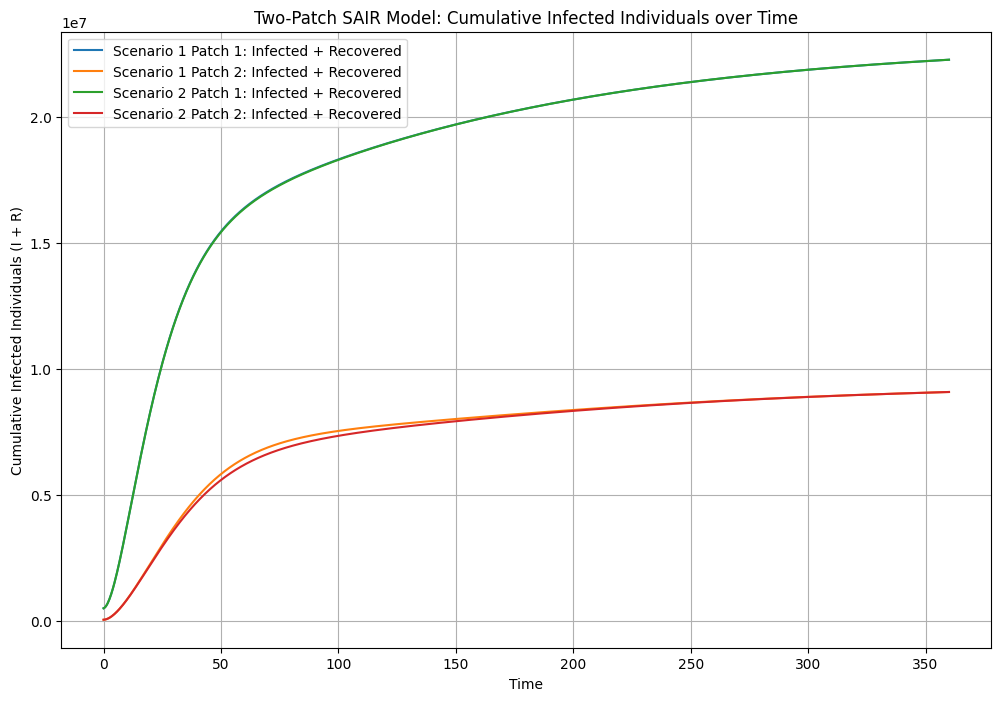

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define the two patches model
def covid_model(t, y, gamma_I1, gamma_A1, gamma_I2, gamma_A2, alpha, nu, bi1, bi2, beta, phi, sigma, mu, mu_c, lambda_I, lambda_A, N1, N2, theta1, theta2, P11, P12, P21, P22):
    S1, E1, I1, A1, V1, R1, S2, E2, I2, A2, V2, R2 = y

    delta_I1 = gamma_I1*P11*((P11*I1+P21*I2)/(P11*N1+P21*N2)) + gamma_I2*P12*((P12*I1+P22*I2)/(P12*N1+P22*N2))
    delta_A1 = gamma_A1*P11*((P11*A1+P21*A2)/(P11*N1+P21*N2)) + gamma_A2*P12*((P12*A1+P22*A2)/(P12*N1+P22*N2))
    delta_I2 = gamma_I1*P21*((P11*I1+P21*I2)/(P11*N1+P21*N2)) + gamma_I2*P22*((P12*I1+P22*I2)/(P12*N1+P22*N2))
    delta_A2 = gamma_A1*P21*((P11*A1+P21*A2)/(P11*N1+P21*N2)) + gamma_A2*P22*((P12*A1+P22*A2)/(P12*N1+P22*N2))

    N1 = S1 + E1 + I1 + A1 + V1 + R1
    N2 = S2 + E2 + I2 + A2 + V2 + R2

    # Equations for Patch No 1 and No 2
    dS1dt = theta1 - nu * bi1 * S1 - S1 * delta_I1 - S1 * delta_A1 - mu * S1
    dE1dt = S1 * delta_I1 + S1 * delta_A1 + V1 * (1 - alpha) * delta_I1 + V1 * (1 - alpha) * delta_A1 - beta * E1 - mu * E1
    dI1dt = (1 - sigma) * beta * E1 - mu_c * I1 - lambda_I * I1 - mu * I1
    dA1dt = sigma * beta * E1 - lambda_A * A1 - mu * A1
    dV1dt = nu * bi1 * S1 - V1 * (1 - alpha) * delta_I1 - V1 * (1 - alpha) * delta_A1 - phi * V1 - mu * V1
    dR1dt = lambda_A * A1 + lambda_I * I1 + phi * V1 - mu * R1
    dS2dt = theta2 - nu * bi2 * S2 - S2 * delta_I2 - S2 * delta_A2 - mu * S2
    dE2dt = S2 * delta_I2 + S2 * delta_A2 + V2 * (1 - alpha) * delta_I2 + V2 * (1 - alpha) * delta_A2 - beta * E2 - mu * E2
    dI2dt = (1 - sigma) * beta * E2 - mu_c * I2 - lambda_I * I2 - mu * I2
    dA2dt = sigma * beta * E2 - lambda_A * A2 - mu * A2
    dV2dt = nu * bi2 * S2 - V2 * (1 - alpha) * delta_I2 - V2 * (1 - alpha) * delta_A2 - phi * V2 - mu * V2
    dR2dt = lambda_A * A2 + lambda_I * I2 + phi * V2 - mu * R2

    return [dS1dt, dE1dt, dI1dt, dA1dt, dV1dt, dR1dt, dS2dt, dE2dt, dI2dt, dA2dt, dV2dt, dR2dt]

# Initial conditions for patches 1 and 2
N1 = 1.8 * 10**7
N2 = 0.9 * 10**7
E10 = 100000
I10 = 500000
A10 = 100000
V10 = 10000
R10 = 5000
S10 = N1 - (E10 + I10 + A10 + V10 + R10)
E20 = 10000
I20 = 50000
A20 = 10000
V20 = 1000
R20 = 500
S20 = N2 - (E20 + I20 + A20 + V20 + R20)
y0 = [S10, E10, I10, A10, V10, R10, S20, E20, I20, A20, V20, R20]

# Fixed parameters
gamma_I = 0.2
gamma_I1 = 0.1
gamma_A1 = 0.8 * gamma_I
gamma_I2 = 0.35
gamma_A2 = 0.8 * gamma_I
alpha = 0.92
nu = 0.0982 * 2
bi1 = 0.3
bi2 = 0.1
beta = 1 / 2.8
phi = 1 / 10.17
sigma = 0.35
mu = 0.007152
mu_c = 0.00189
lambda_I = 1 / 9
lambda_A = 1 / 9
theta1 = 0.011 * N1
theta2 = 0.011 * N2
alpha = 0.2
P11 = 0.8
P12 = 0.2

# Parameter sets for different scenarios
parameter_sets = [
    (gamma_I1, gamma_A1, gamma_I2, gamma_A2, alpha, nu, bi1, bi2, beta, phi, sigma, mu, mu_c, lambda_I, lambda_A, N1, N2, theta1, theta2, P11, P12, 0.1, 0.9),  # Scenario 1
    (gamma_I1, gamma_A1, gamma_I2, gamma_A2, alpha, nu, bi1, bi2, beta, phi, sigma, mu, mu_c, lambda_I, lambda_A, N1, N2, theta1, theta2, P11, P12, 0.2, 0.8)   # Scenario 2
]

# Time span
t_span = [0, 360]
t_eval = np.linspace(t_span[0], t_span[1], 1000)

# Solving the differential equations for each set of parameters
solutions = []
for params in parameter_sets:
    sol = solve_ivp(covid_model, t_span, y0, args=params, t_eval=t_eval)
    solutions.append(sol)

# Plotting the results
plt.figure(figsize=(12, 8))

for i, sol in enumerate(solutions):
    S1, E1, I1, A1, V1, R1, S2, E2, I2, A2, V2, R2 = sol.y
    plt.plot(sol.t, I1 + R1, label=f'Scenario {i+1} Patch 1: Infected + Recovered')
    plt.plot(sol.t, I2 + R2, label=f'Scenario {i+1} Patch 2: Infected + Recovered')

plt.xlabel('Time')
plt.ylabel('Cumulative Infected Individuals (I + R)')
plt.title('Two-Patch SAIR Model: Cumulative Infected Individuals over Time')
plt.legend()
plt.grid(True)
plt.show()


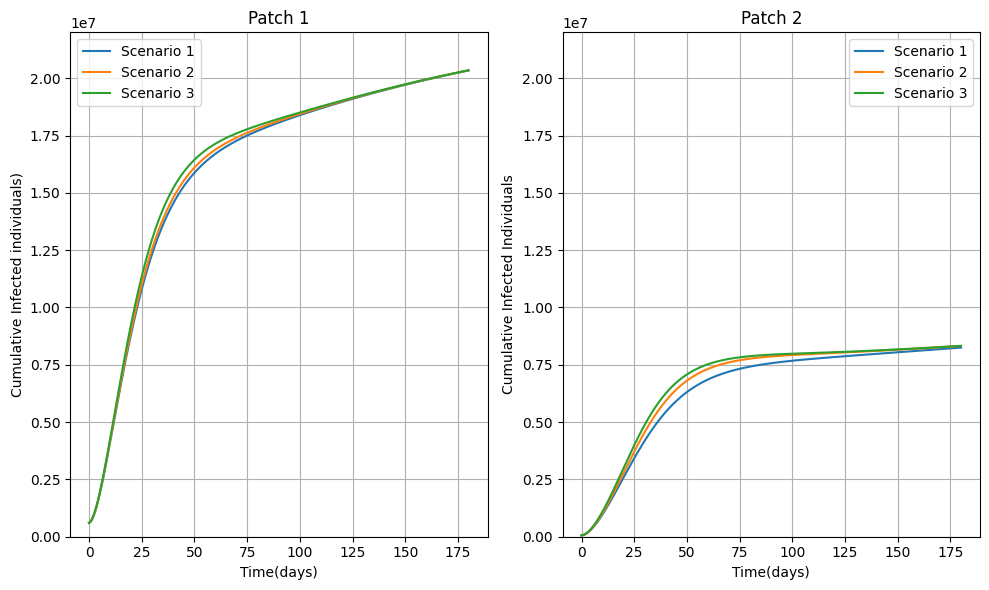

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define the two patches model
def covid_model(t, y, gamma_I1, gamma_A1, gamma_I2, gamma_A2, alpha, nu, bi1, bi2, beta, phi, sigma, mu, mu_c, lambda_I, lambda_A, N1, N2, theta1, theta2, P11, P12, P21, P22):
    S1, E1, I1, A1, V1, R1, S2, E2, I2, A2, V2, R2 = y

    delta_I1 = gamma_I1 * P11 * ((P11 * I1 + P21 * I2) / (P11 * N1 + P21 * N2)) + gamma_I2 * P12 * ((P12 * I1 + P22 * I2) / (P12 * N1 + P22 * N2))
    delta_A1 = gamma_A1 * P11 * ((P11 * A1 + P21 * A2) / (P11 * N1 + P21 * N2)) + gamma_A2 * P12 * ((P12 * A1 + P22 * A2) / (P12 * N1 + P22 * N2))
    delta_I2 = gamma_I1 * P21 * ((P11 * I1 + P21 * I2) / (P11 * N1 + P21 * N2)) + gamma_I2 * P22 * ((P12 * I1 + P22 * I2) / (P12 * N1 + P22 * N2))
    delta_A2 = gamma_A1 * P21 * ((P11 * A1 + P21 * A2) / (P11 * N1 + P21 * N2)) + gamma_A2 * P22 * ((P12 * A1 + P22 * A2) / (P12 * N1 + P22 * N2))

    N1 = S1 + E1 + I1 + A1 + V1 + R1
    N2 = S2 + E2 + I2 + A2 + V2 + R2

    # Equations for Patch No 1 and No 2
    dS1dt = theta1 - nu * bi1 * S1 - S1 * delta_I1 - S1 * delta_A1 - mu * S1
    dE1dt = S1 * delta_I1 + S1 * delta_A1 + V1 * (1 - alpha) * delta_I1 + V1 * (1 - alpha) * delta_A1 - beta * E1 - mu * E1
    dI1dt = (1 - sigma) * beta * E1 - mu_c * I1 - lambda_I * I1 - mu * I1
    dA1dt = sigma * beta * E1 - lambda_A * A1 - mu * A1
    dV1dt = nu * bi1 * S1 - V1 * (1 - alpha) * delta_I1 - V1 * (1 - alpha) * delta_A1 - phi * V1 - mu * V1
    dR1dt = lambda_A * A1 + lambda_I * I1 + phi * V1 - mu * R1
    dS2dt = theta2 - nu * bi2 * S2 - S2 * delta_I2 - S2 * delta_A2 - mu * S2
    dE2dt = S2 * delta_I2 + S2 * delta_A2 + V2 * (1 - alpha) * delta_I2 + V2 * (1 - alpha) * delta_A2 - beta * E2 - mu * E2
    dI2dt = (1 - sigma) * beta * E2 - mu_c * I2 - lambda_I * I2 - mu * I2
    dA2dt = sigma * beta * E2 - lambda_A * A2 - mu * A2
    dV2dt = nu * bi2 * S2 - V2 * (1 - alpha) * delta_I2 - V2 * (1 - alpha) * delta_A2 - phi * V2 - mu * V2
    dR2dt = lambda_A * A2 + lambda_I * I2 + phi * V2 - mu * R2

    return [dS1dt, dE1dt, dI1dt, dA1dt, dV1dt, dR1dt, dS2dt, dE2dt, dI2dt, dA2dt, dV2dt, dR2dt]

# Initial conditions for patches 1 and 2
N1 = 1.8 * 10**7
N2 = 0.9 * 10**7
E10 = 100000
I10 = 500000
A10 = 100000
V10 = 10000
R10 = 5000
S10 = N1 - (E10 + I10 + A10 + V10 + R10)
E20 = 10000
I20 = 50000
A20 = 10000
V20 = 1000
R20 = 500
S20 = N2 - (E20 + I20 + A20 + V20 + R20)
y0 = [S10, E10, I10, A10, V10, R10, S20, E20, I20, A20, V20, R20]

# Fixed parameters
gamma_I1 = 0.2
gamma_A1 = 0.8 * gamma_I1
gamma_I2 = 0.36
gamma_A2 = 0.8 * gamma_I2
alpha = 0.92
nu = 0.0982 * 2
bi1 = 0.3
bi2 = 0.1
beta = 1 / 2.8
phi = 1 / 10.17
sigma = 0.35
mu = 0.007152
mu_c = 0.00189
lambda_I = 1 / 9
lambda_A = 1 / 9
theta1 = 0.011 * N1
theta2 = 0.011 * N2
alpha = 0.2
P12 = 0.9
P22 = 0.1

# Parameter sets for different scenarios
parameter_sets = [
    (gamma_I1, gamma_A1, gamma_I2, gamma_A2, alpha, nu, bi1, bi2, beta, phi, sigma, mu, mu_c, lambda_I, lambda_A, N1, N2, theta1, theta2, 0.9, 0.1, 0.4, 0.6),  # Scenario 1
    (gamma_I1, gamma_A1, gamma_I2, gamma_A2, alpha, nu, bi1, bi2, beta, phi, sigma, mu, mu_c, lambda_I, lambda_A, N1, N2, theta1, theta2, 0.8, 0.2, 0.2, 0.8),   # Scenario 2
    #(gamma_I1, gamma_A1, gamma_I2, gamma_A2, alpha, nu, bi1, bi2, beta, phi, sigma, mu, mu_c, lambda_I, lambda_A, N1, N2, theta1, theta2, 0.3, 0.7, P12, P22),  # Scenario 3
    (gamma_I1, gamma_A1, gamma_I2, gamma_A2, alpha, nu, bi1, bi2, beta, phi, sigma, mu, mu_c, lambda_I, lambda_A, N1, N2, theta1, theta2, 0.6, 0.4, 0.1, 0.9)   # Scenario 3
]

# Time span
t_span = [0, 180]
t_eval = np.linspace(t_span[0], t_span[1], 1000)

# Solving the differential equations for each set of parameters
solutions = []
for params in parameter_sets:
    sol = solve_ivp(covid_model, t_span, y0, args=params, t_eval=t_eval)
    solutions.append(sol)


# Plotting the results in subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 6), sharex=True)

for i, sol in enumerate(solutions):
    S1, E1, I1, A1, V1, R1, S2, E2, I2, A2, V2, R2 = sol.y
    axs[0].plot(sol.t, I1 + A1 + R1, label=f'Scenario {i+1}')
    axs[1].plot(sol.t, I2 + A2 + R2, label=f'Scenario {i+1}')

# Set common y-axis limits
axs[0].set_ylim(0, 2.2*10**7)
axs[1].set_ylim(0, 2.2*10**7)

axs[0].set_ylabel('Cumulative Infected individuals)')
axs[0].set_xlabel('Time(days)')
axs[0].set_title('Patch 1')
axs[0].legend()
axs[0].grid(True)

axs[1].set_xlabel('Time(days)')
axs[1].set_ylabel('Cumulative Infected Individuals')
axs[1].set_title('Patch 2')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()


